# Modifying your data in MNE-python

In [2]:
import mne
import os.path as op
import numpy as np
from __future__ import print_function
from matplotlib import pyplot as plt
%matplotlib inline

It is often necessary to modify data once you have loaded it into memory. Common examples of this are signal processing, feature extraction, and data cleaning. Some functionality is pre-built into MNE-python, though it is also possible to apply an arbitrary function to the data.

In [19]:
# Load an example dataset, the preload flag loads the data into memory now
data_path = op.join(mne.datasets.sample.data_path(), 'MEG',
                    'sample', 'sample_audvis_raw.fif')
raw = mne.io.RawFIF(data_path, preload=True, verbose=False)
raw = raw.crop(0, 2)
print(raw)

<Raw  |  n_channels x n_times : 376 x 1202>


## Signal processing
Most MNE objects have in-built methods for filtering:

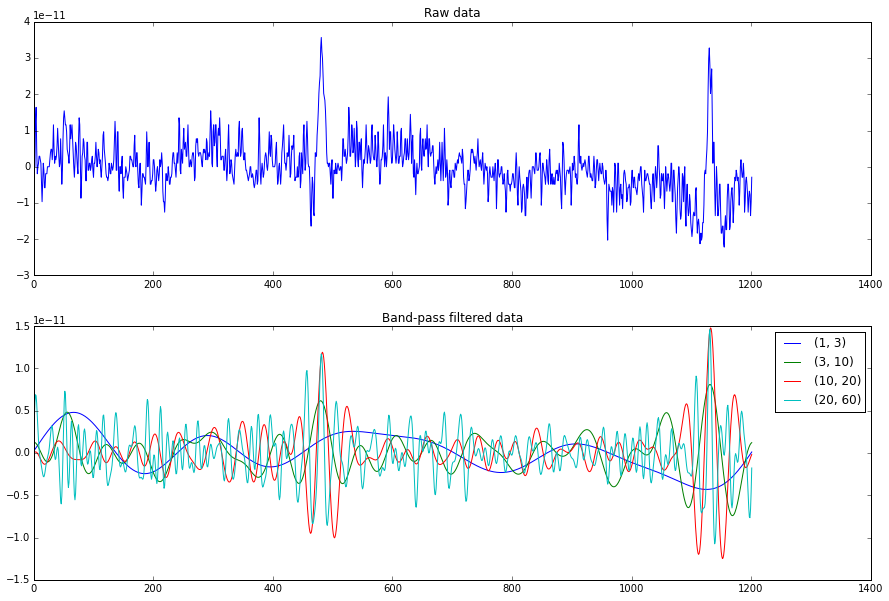

In [23]:
filt_bands = [(1, 3), (3, 10), (10, 20), (20, 60)]
f, (ax, ax2) = plt.subplots(2, 1, figsize=(15, 10))
_ = ax.plot(raw._data[0])
for fband in filt_bands:
    raw_filt = raw.copy()
    raw_filt.filter(*fband)
    _ = ax2.plot(raw_filt._data[0])
ax2.legend(filt_bands)
ax.set_title('Raw data')
ax2.set_title('Band-pass filtered data')

In addition, there are functions for applying the Hilbert transform, which is useful to calculate phase / amplitude of your signal

In [73]:
# Filter signal, then take hilbert transform
raw_band = raw.copy()
raw_band.filter(12, 18)
raw_hilb = raw_band.copy()
hilb_picks = mne.pick_types(raw_band.info, meg=False, eeg=True)
raw_hilb.apply_hilbert(hilb_picks)
print(raw_hilb._data.dtype)

Finally, it is possible to apply arbitrary to your data to do what you want. Here we will use this to take the amplitude and phase of the hilbert transformed data. (note that you can use `amplitude=True` in the call to `apply_hilbert` to do this automatically).

In [ ]:
# Take the amplitude and phase
raw_amp = raw_hilb.copy()
raw_amp.apply_function(np.abs, hilb_picks, float, 1)
raw_phase = raw_hilb.copy()
raw_phase.apply_function(np.angle, hilb_picks, float, 1)

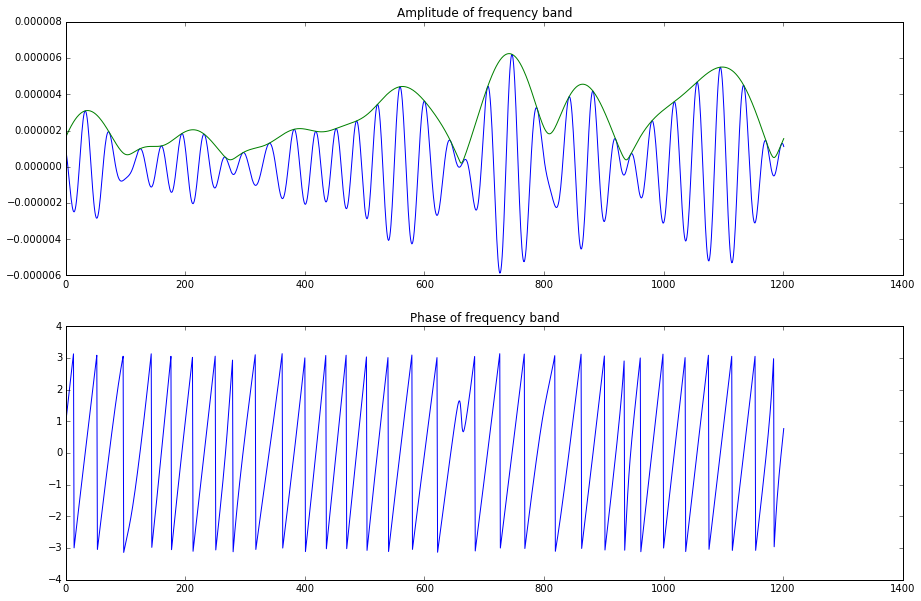

In [77]:
f, (a1, a2) = plt.subplots(2, 1, figsize=(15, 10))
a1.plot(raw_band._data[hilb_picks[0]])
a1.plot(raw_amp._data[hilb_picks[0]])
a2.plot(raw_phase._data[hilb_picks[0]])
a1.set_title('Amplitude of frequency band')
a2.set_title('Phase of frequency band')